# Descripción del proyecto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
Analizar los factores que más impactan la pérdida.
Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
identificar a los grupos objetivo;
sugerir medidas para reducir la rotación;
describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

# Paso 1. Descargar los datos

Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:

- 'Churn' — la cancelación para el mes en cuestión
Campos de dataset actuales:
Datos del usuario del mes anterior
- 'gender'.
- 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
- 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
- Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
- 'Phone' — si el/la usuario/a aportó el número de teléfono.
- 'Age'.
- 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

**Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:**

- 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
- 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
- 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
- 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
- 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
- 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv', sep=',')

In [3]:
print("\nInformación del dataset:")

gym.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total     

# Paso 2: Llevar a cabo el análisis exploratorio de datos (EDA)

**Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).**

In [4]:
#Verificar valores ausentes

missing_values = gym.isnull().sum()
print("\nValores ausentes por columna:")
print(missing_values[missing_values > 0])


Valores ausentes por columna:
Series([], dtype: int64)


In [5]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [6]:
print("\nEstadísticas descriptivas:")
print(gym.describe())


Estadísticas descriptivas:
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25% 

**Análisis de Características**

Demografía y Ubicación:

- Gender (0.51 promedio): Aproximadamente la mitad de los usuarios son hombres (0) o mujeres (1). Esto puede ser útil para segmentar el marketing.
- Near_Location (0.84 promedio): Un alto porcentaje de usuarios vive o trabaja cerca del gimnasio. Esto sugiere que la cercanía puede ser un factor positivo para la retención.

Afiliación y Contacto:

- Partner (0.49 promedio): Alrededor del 49% de los usuarios trabajan en empresas asociadas. Esto podría influir en la fidelidad, ya que ofrecen descuentos.
- Promo_friends (0.31 promedio): Un 31% se inscribió a través de un programa de referidos. Esto podría indicar que los usuarios que entran por recomendaciones podrían ser más propensos a quedarse.
Estado de la Membresía:

- Contract_period (4.68 promedio): La duración media del contrato es de aproximadamente 5 meses, lo que indica que muchos usuarios optan por períodos más cortos. Esto podría correlacionarse con una mayor tasa de cancelación.
- Month_to_end_contract (4.32 promedio): En promedio, los usuarios tienen unos 4 meses restantes en su contrato, lo que puede ser un factor importante para identificar posibles cancelaciones.

Frecuencia de Uso:

- Avg_class_frequency_total (1.88 promedio): La frecuencia media de visitas es relativamente baja. Si los usuarios no asisten - con regularidad, esto puede ser un indicador de riesgo de cancelación.
- Avg_class_frequency_current_month (1.77 promedio): Similar a la frecuencia total, lo que sugiere que los usuarios no están aumentando su asistencia.

Finanzas:

- Avg_additional_charges_total (146.94 promedio): El gasto adicional promedio es significativo. Aquellos que gastan más en servicios adicionales pueden estar más comprometidos con el gimnasio.
- Lifetime (3.72 promedio): La duración media de la membresía es de alrededor de 3.7 meses, lo que indica que muchos usuarios no permanecen por mucho tiempo.
- Churn (0.27 promedio): Aproximadamente el 27% de los usuarios cancelaron. Esto puede considerarse un índice de rotación moderado.

**Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron.**

In [7]:
#Comparar características entre grupos

churned = gym[gym['Churn'] == 1]
not_churned = gym[gym['Churn'] == 0]

print("\nPromedios de características para clientes que se fueron:")
print(churned.mean())

print("\nPromedios de características para clientes que se quedaron:")
print(not_churned.mean())


Promedios de características para clientes que se fueron:
gender                                 0.510839
Near_Location                          0.768143
Partner                                0.355325
Promo_friends                          0.183789
Phone                                  0.902922
Contract_period                        1.728558
Group_visits                           0.268615
Age                                   26.989632
Avg_additional_charges_total         115.082899
Month_to_end_contract                  1.662582
Lifetime                               0.990575
Avg_class_frequency_total              1.474995
Avg_class_frequency_current_month      1.044546
Churn                                  1.000000
dtype: float64

Promedios de características para clientes que se quedaron:
gender                                 0.510037
Near_Location                          0.873086
Partner                                0.534195
Promo_friends                          0.353522
P

Análisis de las Características

Demografía:

- Gender: La proporción de hombres y mujeres es similar en ambos grupos (0.51 para los que se fueron y 0.51 para los que se quedaron), lo que sugiere que el género no es un factor determinante en la cancelación.

Ubicación:

- Near_Location: Los que se quedaron tienen una mayor proporción de usuarios que viven o trabajan cerca del gimnasio (0.87) en comparación con los que se fueron (0.77). Esto indica que la proximidad puede ser un factor importante para la retención.

Afiliación y Contacto:

- Partner: Solo el 35.5% de los que se fueron trabajan para empresas asociadas, mientras que el 53.4% de los que se quedaron sí lo hacen. Esto sugiere que tener un empleo en una empresa asociada podría ser un indicador positivo de lealtad.

- Promo_friends: La tasa de usuarios que se unieron mediante referidos es mucho más baja entre los que se fueron (18.4%) en comparación con los que se quedaron (35.4%). Esto sugiere que las recomendaciones pueden ser un buen indicador de retención.

Estado de la Membresía:

- Contract_period: La duración media del contrato es significativamente más corta para los que se fueron (1.73 meses) frente a los que se quedaron (5.75 meses). Esto indica que los contratos más largos podrían estar relacionados con una mayor retención.

- Month_to_end_contract: Los que se quedaron tienen un promedio de 5.28 meses restantes en su contrato, mientras que los que se fueron solo tienen 1.66 meses. Esto puede sugerir que los que están cerca de la fecha de finalización de su contrato son más propensos a cancelar.

Frecuencia de Uso:

- Group_visits: Solo el 26.9% de los que se fueron participaron en sesiones grupales, en comparación con el 46.4% de los que se quedaron. Esto sugiere que la participación en actividades grupales puede ser un factor positivo para la retención.

- Avg_class_frequency_total y Avg_class_frequency_current_month: La frecuencia de asistencia es más baja entre los que se fueron (1.47 y 1.04 respectivamente) en comparación con los que se quedaron (2.02 y 2.03). Esto indica que los clientes que asisten con más frecuencia tienen menos probabilidades de cancelar.

Finanzas:

- Avg_additional_charges_total: Los que se quedaron gastan más en servicios adicionales (158.45) comparado con aquellos que se fueron (115.08). Esto puede sugerir que aquellos más comprometidos y satisfechos tienden a gastar más.

- Lifetime: La duración promedio de la membresía es notablemente más alta para los que se quedaron (4.71 meses) en comparación con los que se fueron (0.99 meses). Esto indica que los clientes que se quedan tienen una mayor lealtad y permanencia.

**Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.**

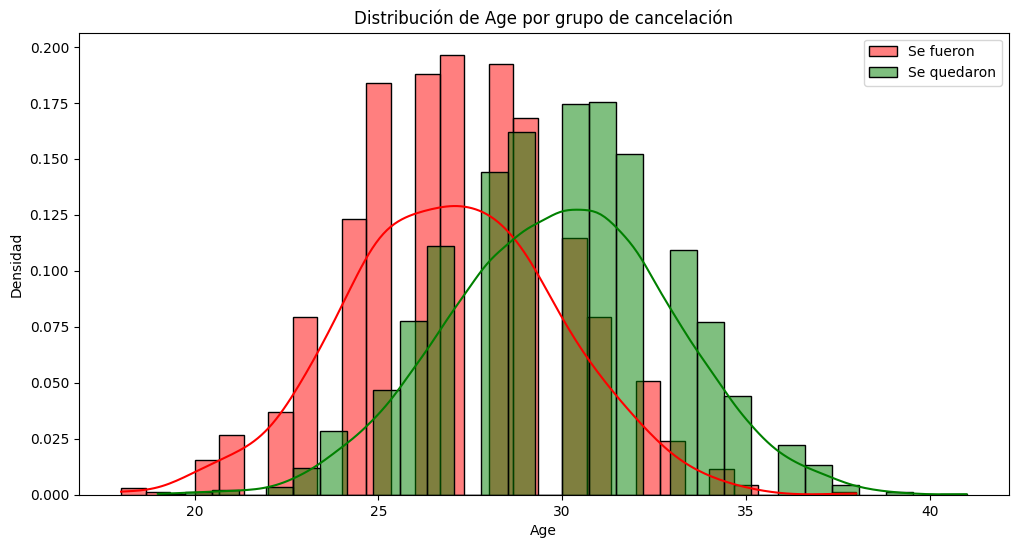

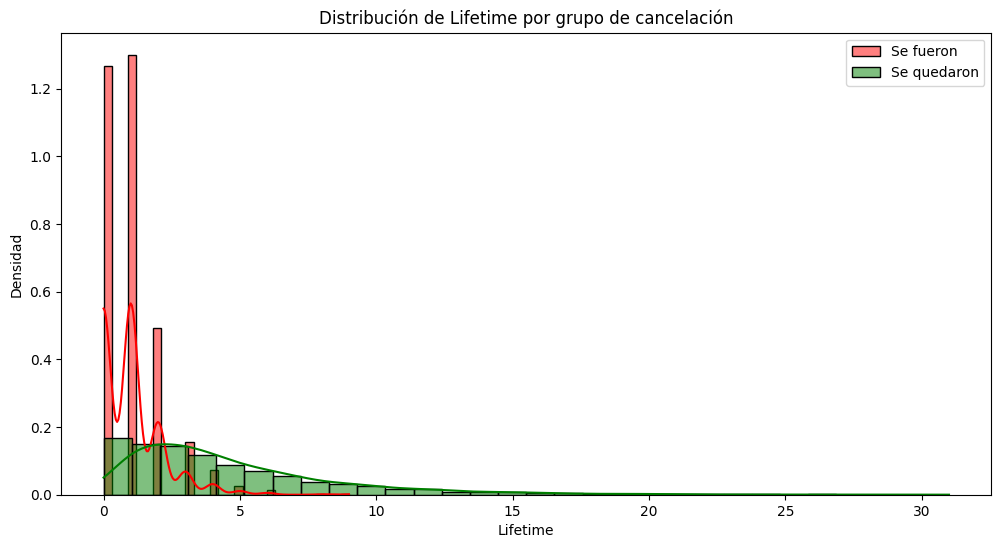

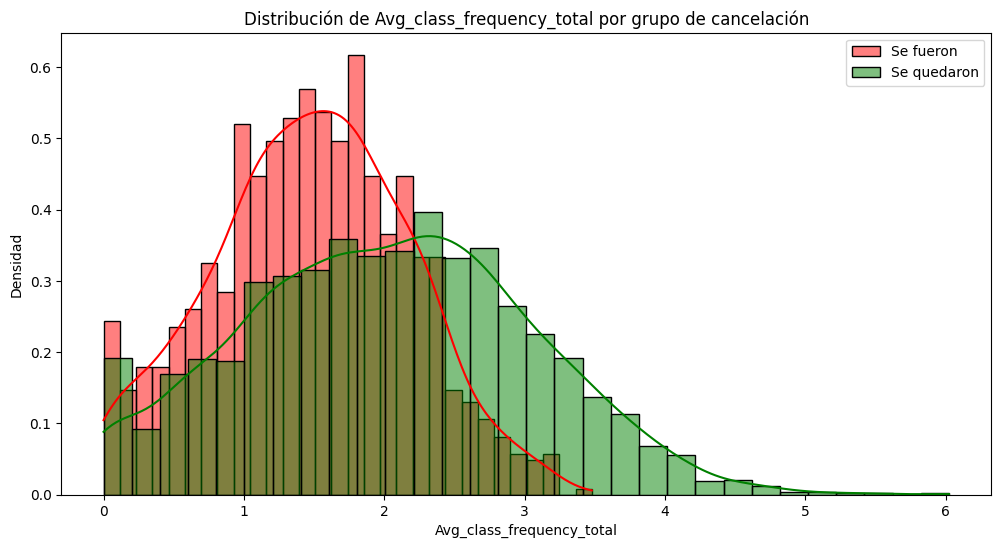

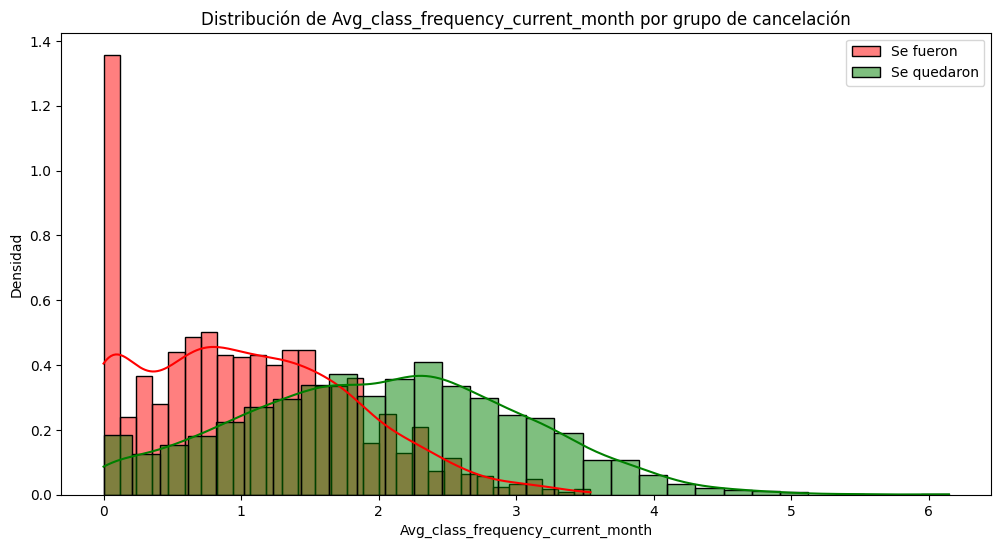

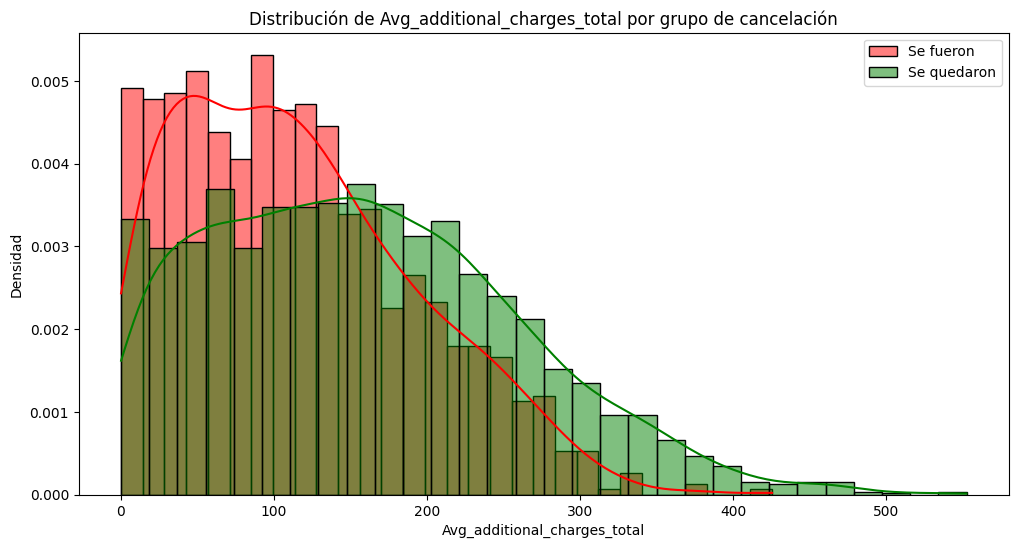

In [8]:
#Histogramas de características
features_to_plot = ['Age', 'Lifetime', 'Avg_class_frequency_total', 
                    'Avg_class_frequency_current_month', 'Avg_additional_charges_total']

for feature in features_to_plot:
    plt.figure(figsize=(12, 6))
    
    # Filtrar datos para los que se fueron (Churn == 1)
    sns.histplot(churned[feature], color='red', label='Se fueron', kde=True, stat="density", bins=30)
    
    # Filtrar datos para los que se quedaron (Churn == 0)
    sns.histplot(not_churned[feature], color='green', label='Se quedaron', kde=True, stat="density", bins=30)
    
    plt.title(f'Distribución de {feature} por grupo de cancelación')
    plt.xlabel(feature)
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()

- age: Los usuarios que se fueron son más jóvenes en comparación con los que se quedaron. Esto podría indicar que los clientes más jóvenes son más propensos a cambiar de gimnasio.

- Tiempo de Vida (Lifetime): Hay una diferencia significativa en el tiempo de vida de los clientes. Los que se quedan tienen un tiempo de vida mucho mayor, lo que resalta la necesidad de abordar la retención de los nuevos clientes antes de que se vayan.

- Frecuencia Promedio de Clases Total (Avg_class_frequency_total): La frecuencia de asistencia es notablemente menor en los clientes que se fueron. Fomentar una mayor participación en clases podría ayudar a mejorar la retención.

- Frecuencia Promedio de Clases del Mes Actual (Avg_class_frequency_current_month): Los clientes que se quedan asisten a más clases en el mes actual, lo que sugiere que la participación reciente puede ser un indicador clave de lealtad.

- Cargos Adicionales Promedio (Avg_additional_charges_total): Los clientes que se quedaron tienden a incurrir en más cargos adicionales. Esto podría significar que están utilizando más servicios o productos adicionales, lo que podría estar relacionado con su compromiso general.

**Crea una matriz de correlación y muéstrala.**

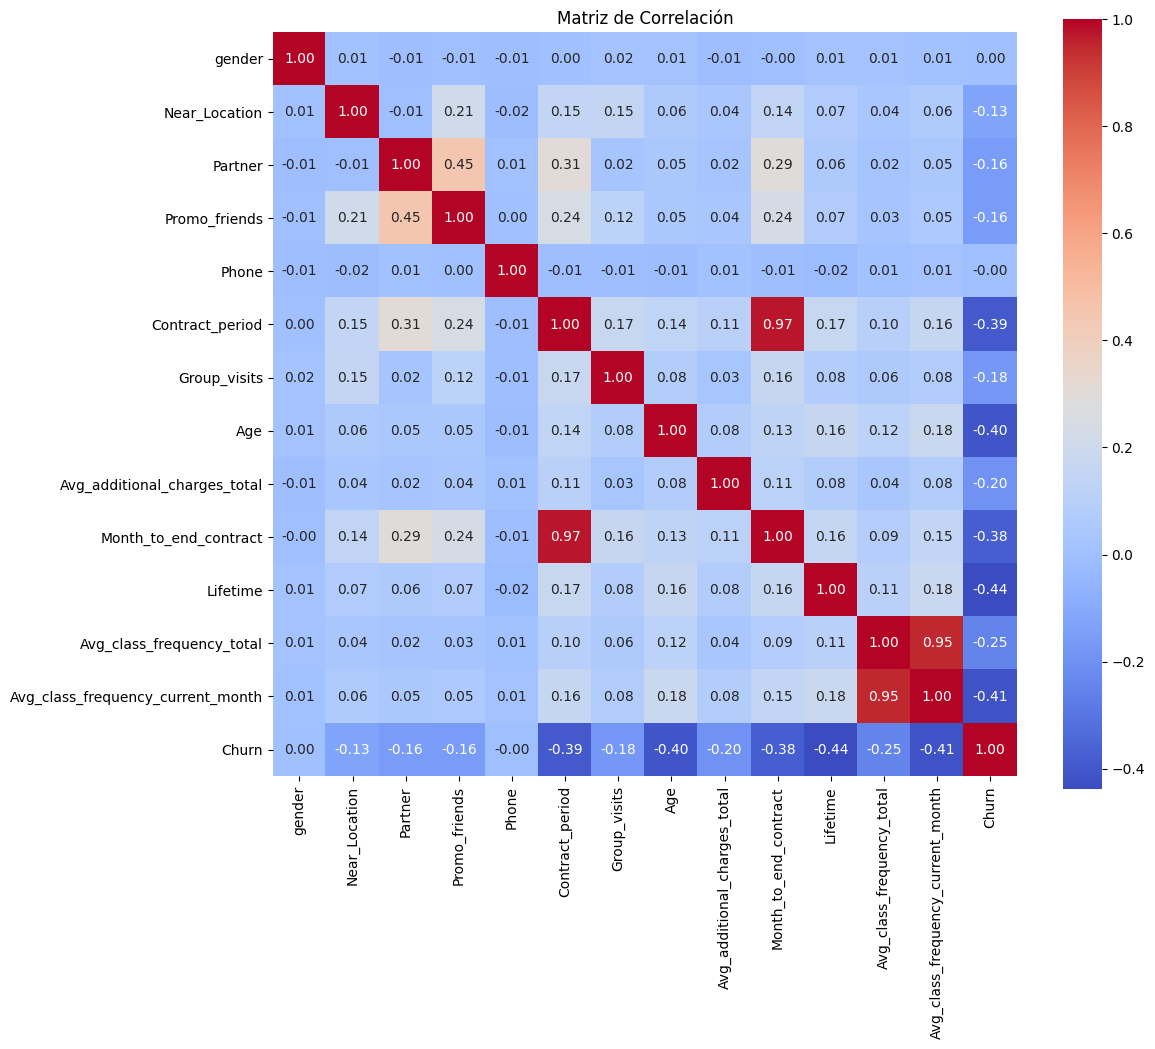

In [9]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
correlation_matrix = gym.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

La matriz muestra las relaciones entre las diferentes características del dataset y la variable objetivo, que en este caso es Churn. Aquí hay un desglose de las correlaciones más relevantes:

Correlaciones Clave de Variables Relacionadas con Churn:

- Contract_period: Tiene una correlación negativa de -0.39 con Churn. Esto sugiere que los clientes con contratos más largos tienen menor probabilidad de cancelar.

- Month_to_end_contract: También presenta una correlación negativa de -0.38, indicando que los clientes que están más cerca de que se les termine el contrato tienen más probabilidades de cancelar.

- Lifetime: Tiene una correlación negativa de -0.44. Esto sugiere que a medida que los clientes pasan más tiempo en el gimnasio, son menos propensos a cancelar.

- Avg_class_frequency_current_month: Correlación de -0.41, lo que indica que los clientes que asisten más frecuentemente en el mes actual tienen menos probabilidades de cancelar.

- Avg_class_frequency_total: Correlación de -0.25, lo que sugiere que una mayor frecuencia de visitas en general está asociada con menor probabilidad de cancelación.

Variables Menos Relevantes:

Gender, Phone, Group_visits, Age: Estas características tienen correlaciones muy bajas (cercanas a 0) con Churn, lo que sugiere que no son factores significativos en la decisión de cancelación.

Variables Intermedias:

- Partner: Correlación de -0.16, indicando que los clientes que trabajan en empresas asociadas tienden a cancelar con menos frecuencia, pero no es una relación muy fuerte.
- Promo_friends: También tiene una correlación negativa de -0.16. Esto sugiere que los clientes que se unieron mediante promociones de amigos tienen una ligera tendencia a cancelar más.

Frecuencia de Visitas:

Las correlaciones entre Avg_class_frequency_total y Avg_class_frequency_current_month con Churn son significativas, lo que refuerza la idea de que la frecuencia de uso es un buen indicador de retención.


# Paso 3. Construir un modelo para predecir la cancelación de usuarios

**Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.**

In [10]:
#Importar librerías necesarias

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


In [11]:
# Selecciona las características relevantes y la variable objetivo (Churn):
# Definir la variable objetivo y las características
X = gym.drop(columns=['Churn'])
y = gym['Churn']

**Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().**

In [12]:
# Dividir los Datos en Conjuntos de Entrenamiento y Validación
# Dividir los datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Entrena el modelo en el set de entrenamiento con dos métodos:
regresión logística;
bosque aleatorio.**

In [13]:
# Entrenar modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Hacer predicciones
y_pred_log_reg = log_reg.predict(X_val)
y_pred_log_reg

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [14]:
# Entrenar el Modelo de Bosque Aleatorio

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_clf.predict(X_val)
y_pred_rf

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

**Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?
Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo. **

In [15]:
#Evaluar los Modelos
#Ahora, evaluaremos ambos modelos utilizando exactitud, precisión y recall.

# Evaluar regresión logística
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
precision_log_reg = precision_score(y_val, y_pred_log_reg)
recall_log_reg = recall_score(y_val, y_pred_log_reg)

print("Regresión Logística:")
print(f"Exactitud: {accuracy_log_reg:.4f}")
print(f"Precisión: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(classification_report(y_val, y_pred_log_reg))

# Evaluar bosque aleatorio
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)

print("Bosque Aleatorio:")
print(f"Exactitud: {accuracy_rf:.4f}")
print(f"Precisión: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(classification_report(y_val, y_pred_rf))

Regresión Logística:
Exactitud: 0.9163
Precisión: 0.8729
Recall: 0.7822
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.91      0.92      0.91       800

Bosque Aleatorio:
Exactitud: 0.9100
Precisión: 0.8495
Recall: 0.7822
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



Análisis de los resultados de ambos modelos:

1. Exactitud
Regresión Logística: 0.9163
Bosque Aleatorio: 0.9100
La regresión logística tiene una exactitud ligeramente superior al bosque aleatorio. Esto significa que, en general, la regresión logística fue más precisa en la clasificación de los usuarios que se fueron y los que se quedaron.

2. Precisión
Regresión Logística: 0.8729
Bosque Aleatorio: 0.8495
La precisión mide cuántas de las predicciones positivas (clientes que se fueron) fueron correctas. La regresión logística tiene una precisión más alta, lo que indica que es mejor al evitar falsos positivos (es decir, predecir que un cliente se ha ido cuando en realidad no lo ha hecho).

3. Recall
Ambos modelos tienen el mismo recall: 0.7822.
El recall mide cuántos de los clientes que realmente se fueron fueron identificados correctamente por el modelo. Un recall de 0.7822 indica que el 78.22% de los clientes que realmente se fueron fueron detectados por ambos modelos. Esto sugiere que ambos modelos tienen un desempeño similar en este aspecto.

4. F1-Score
Regresión Logística: 0.83 (aproximadamente)
Bosque Aleatorio: 0.81 (aproximadamente)
El F1-score es una medida que combina precisión y recall. Un F1-score más alto indica un mejor equilibrio entre precisión y recall. La regresión logística tiene un F1-score mejor, lo que sugiere que es un modelo más robusto para este tipo de clasificación.

5. Análisis General
La regresión logística parece ser el mejor modelo en este caso, ya que tiene una mejor exactitud, precisión y F1-score en comparación con el bosque aleatorio.
Ambos modelos tienen un buen recall, lo que significa que identifican correctamente una buena parte de los clientes que se han ido.
En términos de uso, la regresión logística es más simple y puede ser preferible en situaciones donde la interpretabilidad del modelo es importante.

# Paso 4. Crear clústeres de usuarios/as

Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

Estandariza los datos.
Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.
Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)
Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
Traza distribuciones de características para los clústeres. ¿Notas algo?
Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

**Estandariza los datos.**

In [16]:
# Estandarizar los Datos

from sklearn.preprocessing import StandardScaler

# Selecciona las características que deseas utilizar para el clustering
features = gym.drop(columns=['Churn'])

# Estandariza los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

**Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.**

In [ ]:
# Usaremos la función linkage para crear una matriz de distancias y luego trazaremos un dendrograma.

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Verifica que features_scaled no esté vacío
print("Forma de features_scaled:", features_scaled.shape)

# Crea la matriz de distancias
linkage_matrix = linkage(features_scaled, method='ward')

# Verifica que la matriz de distancias se haya creado
print("Matriz de enlace creada con éxito.")

# Traza el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()



Forma de features_scaled: (4000, 13)
Matriz de enlace creada con éxito.


**Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)**

In [ ]:
# Entrenar el Modelo K-means

from sklearn.cluster import KMeans

# Número de clústeres
n_clusters = 5

# Entrena el modelo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Agrega los clústeres al DataFrame original
gym['Cluster'] = clusters

**Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?**

In [ ]:
#Ver Valores Medios de Características por Clúster

cluster_means = gym.groupby('Cluster').mean()
print(cluster_means)

Análisis de los clústeres según los valores medios de las características:

Clúster 0:
Tasa de cancelación: 24.6%
Características:
Alta participación en sesiones grupales (44.9%).
Promedio de edad (29.1 años).
Promedio de cargos adicionales (141.77).
Contrato de aproximadamente 3 meses.

Clúster 1:
Tasa de cancelación: 8.9% (la más baja).
Características:
Alta frecuencia de clases (2.74).
Alta proporción de clientes que viven cerca del gimnasio (84.9%).
Promedio de edad (30.0 años).
Mayor duración de contrato promedio (2.6 meses).
Clúster 2:

Tasa de cancelación: 2.2% (muy baja).
Características:
Alto promedio de duración del contrato (11.85 meses).
Alta participación en sesiones grupales (54.7%).
Frecuencia de clases (2.01).
Los clientes de este grupo son los más leales.

Clúster 3:
Tasa de cancelación: 57.3% (la más alta).
Características:
Muy baja participación en sesiones grupales (27.6%).
Frecuencia de clases muy baja (1.23).
Promedio de edad (28.1 años).
Contrato de aproximadamente 1.9 meses.
Este grupo representa un gran riesgo de pérdida de clientes.

Clúster 4:
Tasa de cancelación: 26.7%.
Características:
Alta proporción de clientes que viven cerca (86.3%).
Contratos de duración media (4.8 meses).
Frecuencia de clases algo baja (1.85).

Conclusiones:

Leales vs. en riesgo:

Leales: Clúster 1 y 2 tienen tasas de cancelación muy bajas. Sus características comunes son una alta frecuencia de clases y participación en sesiones grupales.

En riesgo: Clúster 3 presenta la mayor tasa de cancelación, con baja frecuencia de clases y participación en sesiones grupales.

Oportunidades de retención:

Enfocarse en aumentar la participación en sesiones grupales y la frecuencia de clases para los clientes del Clúster 3 podría ayudar a reducir su alta tasa de cancelación.

Los clientes del Clúster 1 podrían ser un buen objetivo para programas de fidelización debido a su lealtad y compromiso.
Acciones recomendadas:


**Traza distribuciones de características para los clústeres. ¿Notas algo?**

In [ ]:
#Trazar Distribuciones de Características para Cada Clúster

features_to_plot = ['Age', 'Lifetime', 'Avg_class_frequency_total']

for feature in features_to_plot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=feature, data=gym)
    plt.title(f'Distribución de {feature} por Clúster')
    plt.show()


In [ ]:
# Crear un diccionario para almacenar estadísticas descriptivas

cluster_descriptive_stats = {}

for feature in features_to_plot:
    cluster_stats = gym.groupby('Cluster')[feature].describe()
    cluster_descriptive_stats[feature] = cluster_stats

# Mostrar las estadísticas descriptivas para cada característica
for feature, stats in cluster_descriptive_stats.items():
    print(f"Estadísticas descriptivas para {feature}:")
    print(stats)
    print("\n")

Análisis sobre la Edad: La edad parece estar relativamente equilibrada en la mayoría de los clústeres, pero el clúster 3 destaca como el más joven.

Análisis sobre el Tiempo de Vida: Los clústeres 1 y 2 tienen el mayor tiempo de vida, lo que podría indicar que son más leales. El clúster 3, con el menor tiempo, podría ser un área de preocupación.

Análisis sobre la Frecuencia de Clases: El clúster 1 es el más activo, lo que puede ser un indicativo de satisfacción y compromiso. El clúster 3, con la menor frecuencia, podría beneficiarse de estrategias de retención.

Conclusión General

Lealtad y Satisfacción: Los clústeres con mayor tiempo de vida y frecuencia de clases (1 y 2) parecen ser más leales. En contraste, el clúster 3, que es el más joven, tiene el menor tiempo de vida y frecuencia, sugiriendo una posible insatisfacción.

Segmentación de Clientes: Los datos permiten identificar segmentos de clientes que podrían necesitar más atención (clúster 3) y aquellos que son potencialmente más leales (clústeres 1 y 2). Esto puede informar estrategias de marketing y retención.

**Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?**

In [ ]:
#Calcular Tasa de Cancelación por Clúster

churn_rate = gym.groupby('Cluster')['Churn'].mean()
print(churn_rate)


Tasa de Cancelación por Clúster

Clúster 0: 24.64%

Este grupo tiene una tasa de cancelación relativamente alta (24.64%). Esto indica que, aunque hay un porcentaje considerable de clientes que permanecen, hay una porción significativa que decide irse. Esto podría señalar problemas de satisfacción o compromiso que necesitan ser abordados.

Clúster 1: 8.99%

Este clúster muestra la tasa de cancelación más baja (8.99%). La baja tasa sugiere que los miembros de este grupo están más satisfechos o comprometidos con el servicio. Este grupo podría ser considerado como un segmento "leal".

Clúster 2: 2.20%

Con una tasa de cancelación de solo 2.20%, este clúster es el más leal de todos. Esto indica una fuerte retención y satisfacción, lo que podría reflejar un buen ajuste entre los servicios ofrecidos y las expectativas de estos clientes.

Clúster 3: 57.29%

Este clúster tiene la tasa de cancelación más alta (57.29%), lo que es alarmante. Más de la mitad de los clientes en este grupo están abandonando el servicio. Esto podría indicar serios problemas en la experiencia del cliente, falta de valor percibido, o que este grupo tiene características que los hacen más propensos a cancelar.

Clúster 4: 26.68%

Este grupo también presenta una tasa de cancelación considerable (26.68%). Similar al clúster 0, sugiere que hay un número significativo de clientes que no están satisfechos. Es un área que merece atención para mejorar la retención.

# Conclusiones


El análisis de los clústeres ha permitido identificar distintos grupos de clientes con características y comportamientos variados. Esto es crucial para personalizar estrategias de retención y mejorar la satisfacción del cliente.

Las tasas de cancelación varían significativamente entre los clústeres. Los grupos con altas tasas de cancelación (especialmente el clúster 3) presentan una oportunidad crítica para la intervención.

Los clústeres con baja tasa de cancelación (clústeres 1 y 2) indican que hay segmentos de clientes que están satisfechos con el servicio y que es posible replicar ese éxito en otros grupos.

**Recomendaciones**

Desarrollo de Estrategias Personalizadas:

Implementar campañas de marketing y retención dirigidas a cada clúster, considerando sus características y necesidades específicas.
Para el clúster 3, desarrollar programas de reactivación, como descuentos temporales o servicios adicionales para mejorar la experiencia del cliente.

Monitoreo Continuo de la Satisfacción:

Realizar encuestas regulares de satisfacción del cliente y grupos focales, especialmente en los clústeres con altas tasas de cancelación. Esto ayudará a identificar problemas rápidamente y a implementar cambios necesarios.

Entrenamiento del Personal:

Capacitar a los empleados en el manejo de quejas y en la creación de experiencias positivas para el cliente. Esto puede contribuir a mejorar la percepción del servicio y a reducir la tasa de cancelación.
Ofertas y Promociones:

Diseñar programas de lealtad que incentiven a los clientes a permanecer, como recompensas por frecuencia de visitas o tiempo de permanencia, que podrían ser especialmente efectivas para los clústeres 1 y 2.
Evaluación del Producto/Servicio:

Revisar y ajustar la oferta de servicios basada en los datos recopilados. Asegurarse de que los servicios sean percibidos como valiosos y alineados con las expectativas de los clientes.

Análisis Periódico:

Realizar análisis regulares de las características y tasas de cancelación de los clústeres para ajustar las estrategias de manera proactiva.